In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml
import numpy as np
import torch
import torch
import torch.nn as nn

In [4]:
def costFunction(x, x̂, ẙ, y, ŷ, ind):	
#	x -> encoder -> x̂
#	x̂ -> encoder_linear_output -> ẙ	
#	x̂ -> decoder -> ŷ	
#	possible autoencoder objective λ could be 0
#	loss = (x - ŷ)ᒾ + λ * objective(ẙ, y)
#
#	This function can return 1 value or 3 values in a list
#	if return 1 value, just the loss
#	if return 3 values, [total_loss, reconstruction_loss, extra network from ẙ loss]
#
#	In this example, we perform both reconstruction and CE loss
#
	CE_loss = nn.CrossEntropyLoss() #weird pytorch, dim of y is 1, and ŷ is 20x3
	R = torch.sum((x - ŷ) ** 2)/(128*13)	#scaled by batch size times data dimension
	mse = torch.sum((ẙ - y) ** 2)/(128)	#scaled by batch size times data dimension
	loss = R + mse
	return [loss, R, mse]

In [5]:
def costFunction2(x, x̂, ẙ, y, ŷ, ind):	
#	Example of just return 1 value, this is just a regular autoencoder
	return torch.sum((x - ŷ) ** 2)

In [6]:
data = wuml.wData('../../data/shap_regress_example_uniform.csv', label_column_name='label', label_type='continuous', 
				preprocess_data='center and scale',	first_row_is_label=True)

In [7]:
[X_train, X_test, y_train, y_test] = wuml.split_training_test(data, test_percentage=0.2)

In [8]:
AE = wuml.autoencoder(12, X_train, default_depth=2, costFunction=costFunction, # costFunction and costFunction2 both works
						max_epoch=1000, encoder_output_weight_structure=[(1,'none')] ) 
AE.fit()

	epoch: 1000, Total Loss/dimension: 0.4014, Reconstruct loss: 0.0072, Objective loss: 0.3942, Learning Rate: 0.00000049

Result of the data reconstruction

In [9]:
ŷ = AE(data)
wuml.jupyter_print('\n\n')
recontructed = wuml.pretty_np_array(ŷ[0:5,0:5], front_tab='', title='recontruction')
original = wuml.pretty_np_array(data.X[0:5,0:5], front_tab=' ', title='original')
wuml.block_two_string_concatenate(recontructed, original, spacing='\t', auto_print=True)




        recontruction        	           original          
       0      1      2      3	       0      1      2      3
0  0.297  1.100  0.120 -0.028	0  0.109  0.853  0.292  0.279
1  0.153  0.537 -0.295  1.048	1 -0.341  0.591 -0.303  1.388
2  1.877 -0.418  0.562  0.733	2  1.600 -0.402  0.972  0.228
3  0.019  2.305 -1.713 -1.307	3  0.178  1.648 -1.623 -1.184
4 -1.519  1.410  0.973  0.017	4 -1.792  1.297  0.924  1.318



This is the bottleneck output which is d=12

In [10]:
x̂ = AE.reduce_dimension(data, output_type='wData')
wuml.jupyter_print(x̂)
wuml.jupyter_print('\n')

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.341819,0.306166,0.207301,-0.137962,-0.247745,-0.078022,0.114335,0.598718,-0.414439,-0.239487,-0.405774,-0.481940
1,0.396496,0.383315,-0.593414,0.374402,-0.568060,-0.201712,-0.472297,0.913470,-0.940477,-1.030129,-0.254806,0.663804
2,-1.314983,-0.133078,0.837038,-0.332002,0.915384,0.461252,-0.400661,-0.382099,-1.383309,-0.851653,-0.099921,-0.733249
3,-0.527256,0.701070,1.236849,-0.237771,-1.085592,-1.588467,1.478248,0.606662,0.989706,1.327472,0.020722,-1.262122
4,0.925657,0.436341,-1.254504,0.184803,-1.076748,0.489799,-0.202097,1.660528,-0.413451,-0.721720,-0.900658,0.545039
5,-0.747764,0.384202,0.398412,-0.013976,0.698555,-0.442524,-0.763224,0.146782,-1.036579,-0.858779,-0.452496,-0.591093
6,1.217359,0.585540,-1.058867,0.763186,-1.613109,-0.737527,-0.122630,1.437677,-0.605651,-0.895551,0.042935,1.482743
7,0.147254,0.255799,-0.142791,0.445172,-0.632795,-0.487085,-0.220857,0.507662,-1.087272,-0.978047,0.319319,0.827888
8,0.274874,0.501906,0.110118,0.456774,-1.160020,-1.183163,0.361992,0.705836,-0.380310,-0.288426,0.410768,0.590494
9,-0.541139,0.056145,-0.044265,-0.258440,0.385964,0.776192,-0.470476,0.435701,-1.048092,-0.858304,-0.674501,-0.461794


This is the objective network output Training error

Avg error: 1.2029


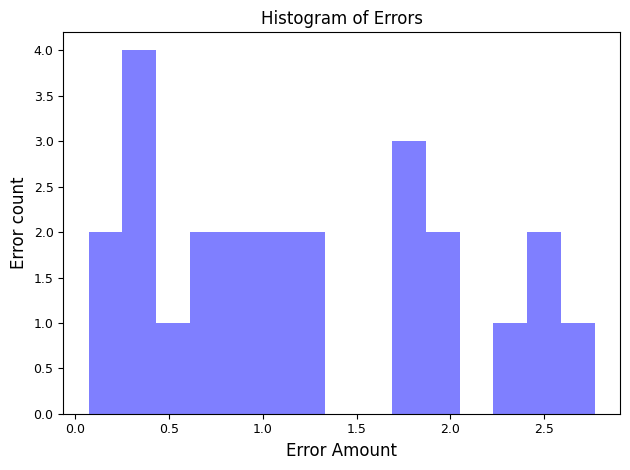

In [11]:
ẙ = AE.objective_network(X_train)
res = wuml.output_regression_result(y_train, ẙ, sort_by='error')

This is the objective network output Test error

Avg error: 0.8217


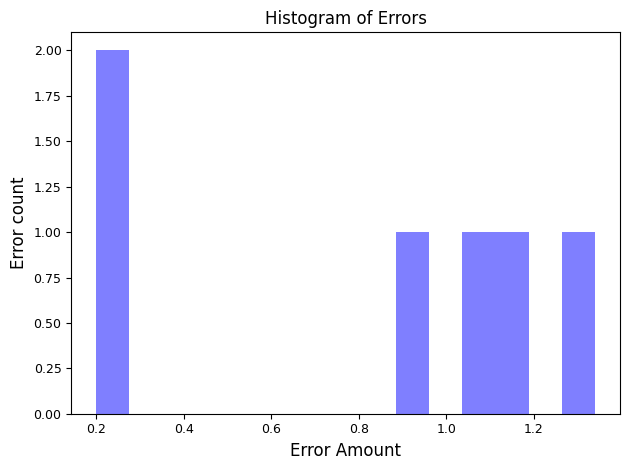

In [12]:
ẙ = AE.objective_network(X_test)
res = wuml.output_regression_result(y_test, ẙ, sort_by='error')